In [1]:
import bigframes.pandas as bpd
from bigframes.ml import vision

### Read from wildcard GCS path

In [2]:
df = bpd.from_glob_path("gs://garrettwu_bucket/images/*")
df

/usr/local/google/home/garrettwu/src/bigframes/bigframes/session/__init__.py:1710: UserWarning: No explicit location is set, so using location US for the session.
  return Session(context)


,uri
0,gs://garrettwu_bucket/images/images.jpeg
1,gs://garrettwu_bucket/images/images (1).jpeg
2,gs://garrettwu_bucket/images/download.jpeg


### Combine with structured data

In [3]:
df["number"] = [0, 1, 2]
df["author"] = ["Alice", "Bob", "Alice"]

In [4]:
df["version"] = df["uri"].blob.version()
df["content_type"] = df["uri"].blob.content_type()
df

,uri,number,author,version,content_type
0,gs://garrettwu_bucket/images/images.jpeg,0,Alice,1708566948182921,image/jpeg
1,gs://garrettwu_bucket/images/images (1).jpeg,1,Bob,1708566948192241,image/jpeg
2,gs://garrettwu_bucket/images/download.jpeg,2,Alice,1708566948168122,image/jpeg


### Display images

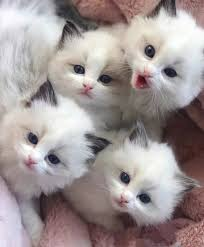

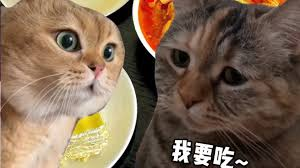

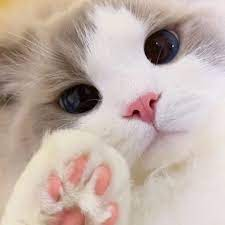

In [5]:
df["uri"].blob.display()

### Blur images

In [6]:
df["blurred"] = df["uri"].blob.img_blur((10, 10), "images_blurred")
df

,uri,number,author,version,content_type,blurred
0,gs://garrettwu_bucket/images/images.jpeg,0,Alice,1708566948182921,image/jpeg,gs://garrettwu_bucket/images_blurred/images.jpeg
1,gs://garrettwu_bucket/images/images (1).jpeg,1,Bob,1708566948192241,image/jpeg,gs://garrettwu_bucket/images_blurred/images (1...
2,gs://garrettwu_bucket/images/download.jpeg,2,Alice,1708566948168122,image/jpeg,gs://garrettwu_bucket/images_blurred/download....


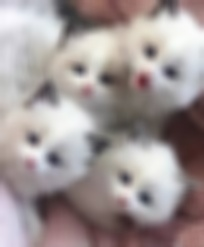

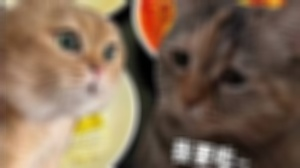

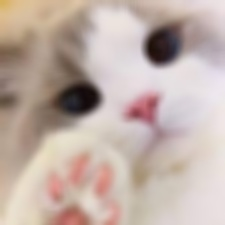

In [7]:
df["blurred"].blob.display()

### BQML Vision Model

In [12]:
b = df[["uri"]]

In [9]:
model = vision.MobileNetV2ImageAnnotator()
result = model.predict(b)
result

,uri,ml_annotate_image_result,ml_annotate_image_status
0,gs://garrettwu_bucket/images/images.jpeg,"{""label_annotations"":[{""description"":""Photogra...",
1,gs://garrettwu_bucket/images/images (1).jpeg,"{""label_annotations"":[{""description"":""Cat"",""mi...",
2,gs://garrettwu_bucket/images/download.jpeg,"{""label_annotations"":[{""description"":""Cat"",""mi...",


In [10]:
result["ml_annotate_image_result"][0]

'{"label_annotations":[{"description":"Photograph","mid":"/m/068jd","score":0.94247919,"topicality":0.94247919},{"description":"Cat","mid":"/m/01yrx","score":0.94069767,"topicality":0.94069767},{"description":"Vertebrate","mid":"/m/09686","score":0.92353737,"topicality":0.92353737},{"description":"White","mid":"/m/083jv","score":0.92189538,"topicality":0.92189538},{"description":"Organism","mid":"/m/05nnm","score":0.85741079,"topicality":0.85741079},{"description":"Mammal","mid":"/m/04rky","score":0.85727209,"topicality":0.85727209},{"description":"Carnivore","mid":"/m/01lrl","score":0.8548364,"topicality":0.8548364},{"description":"Whiskers","mid":"/m/01l7qd","score":0.79979604,"topicality":0.79979604},{"description":"Beauty","mid":"/m/01f43","score":0.75187284,"topicality":0.75187284},{"description":"Snout","mid":"/m/05mqq3","score":0.751562,"topicality":0.751562}]}'

### Vertex Multi-modal model

In [13]:
b["question"] = ["what are the animals in the image?", "How many cats are there in the image?", "How does the cat feel?"]

In [14]:
multi_modal = vision.GeminiMultimodalTextGenerator()
result_mm = multi_modal.predict(b)
result_mm

,uri,question,multimodal_result
0,gs://garrettwu_bucket/images/images.jpeg,what are the animals in the image?,The animals in the image are kittens. They ar...
1,gs://garrettwu_bucket/images/images (1).jpeg,How many cats are there in the image?,There are two cats in the image.
2,gs://garrettwu_bucket/images/download.jpeg,How does the cat feel?,The cat is feeling playful and curious. It is...


In [15]:
result_mm["multimodal_result"][0]

' The animals in the image are kittens. They are a type of small, domesticated mammal. Kittens are known for their playful and curious nature. They are also known for their soft fur and cute appearance.'